### Import packages

In [ ]:

import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;

### Load data

In [ ]:
train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')


### Describe data

In [ ]:
train.shape

(28520, 260)

In [ ]:
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


In [ ]:
train.describe(include='all')


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
count,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,...,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28040.000000,28520.000000,28520.000000
mean,-0.225478,-0.616421,-0.212878,0.336330,0.105467,-0.339634,-0.201756,0.742262,0.942325,-1.957584,...,-0.028098,0.296340,1.724439,-1.476765,0.687445,-1.563062,30.498843,27.975107,0.799299,5.997125
std,0.990632,1.005573,1.075468,1.248919,0.831132,1.073267,0.943505,1.055721,0.940459,0.876939,...,0.989497,1.173378,0.968611,1.032811,1.028328,1.243758,17.328389,5.735913,0.400532,2.375567
min,-4.023911,-5.582544,-4.679888,-4.284380,-3.010300,-5.034355,-4.355222,-3.806574,-2.922614,-5.203347,...,-3.679602,-3.905801,-3.301683,-5.490267,-3.810144,-6.056032,1.000000,22.000000,0.000000,0.000000
25%,-0.869656,-1.287018,-0.913419,-0.478661,-0.437171,-1.075753,-0.823699,0.064072,0.298269,-2.556436,...,-0.692262,-0.550897,1.121631,-2.130906,-0.008394,-2.404028,15.000000,25.000000,1.000000,6.000000
50%,-0.190790,-0.609782,-0.218800,0.295881,0.117310,-0.329571,-0.193263,0.755193,0.940786,-1.949847,...,-0.018218,0.295523,1.783432,-1.449978,0.639575,-1.650610,30.000000,27.000000,1.000000,6.000000
75%,0.457509,0.063174,0.490262,1.119242,0.657941,0.393339,0.417146,1.461846,1.579200,-1.345999,...,0.644112,1.128566,2.383575,-0.799414,1.347263,-0.805710,46.000000,30.000000,1.000000,6.000000
max,4.322171,3.876604,4.267163,5.828656,3.884939,3.890622,3.799406,4.817545,4.615069,1.147192,...,3.915582,4.458014,5.261775,2.861117,5.531152,3.338544,60.000000,61.000000,1.000000,13.000000


### Handle missing values


In [ ]:
columns = train.columns.values
labels = columns[-4:]
features = columns[:-4]



In [ ]:
train[labels].isnull().sum()

label_1      0
label_2    480
label_3      0
label_4      0
dtype: int64

In [ ]:
valid[labels].isnull().sum()

label_1     0
label_2    14
label_3     0
label_4     0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

# missing values are imputed with the median value
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(train[labels])
imp.fit(valid[labels])
train[labels] = imp.transform(train[labels])
valid[labels] =imp.transform(valid[labels])


In [ ]:
train[labels].isnull().sum()

label_1    0
label_2    0
label_3    0
label_4    0
dtype: int64

In [ ]:
valid[labels].isnull().sum()


label_1    0
label_2    0
label_3    0
label_4    0
dtype: int64

In [ ]:
X_train = train[features]
Y_train = train[labels]
X_valid = valid[features]
Y_valid = valid[labels]

### Removing features with low variance

In [ ]:
from sklearn.feature_selection import VarianceThreshold
threshold = VarianceThreshold(threshold=1)
threshold.fit_transform(X_train)
threshold.fit_transform(X_valid)
X_train.shape, X_valid.shape

((28520, 256), (750, 256))

##### no columns were removed

### Check for Correlations between features
##### if there are strongly correlated features using just one of them should be enough


In [ ]:

import seaborn as sns
#Using Pearson Correlation
X_train.corr()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
feature_1,1.000000,-0.122368,-0.043844,0.133359,0.085920,0.143903,0.028939,-0.141357,0.049066,0.180607,...,-0.105048,-0.057641,-0.052484,-0.132177,0.080079,-0.293291,-0.130838,0.213589,-0.029109,-0.046556
feature_2,-0.122368,1.000000,-0.315640,-0.038636,-0.066823,0.014991,0.001485,-0.069789,-0.177971,-0.229639,...,0.011812,0.001762,0.162572,0.052741,-0.097919,0.145376,0.227251,0.142215,0.186345,-0.146253
feature_3,-0.043844,-0.315640,1.000000,0.019540,-0.024949,-0.042450,0.107391,-0.004427,0.133795,0.043577,...,0.039956,-0.030585,-0.196724,0.127026,0.039028,-0.032455,-0.095846,-0.044789,-0.191170,0.045783
feature_4,0.133359,-0.038636,0.019540,1.000000,0.164739,0.342170,-0.033977,-0.120289,0.162836,-0.096058,...,0.110797,0.001961,-0.246270,-0.227987,0.239254,-0.263488,0.018143,0.339311,-0.043473,-0.310500
feature_5,0.085920,-0.066823,-0.024949,0.164739,1.000000,0.165496,-0.277043,-0.086430,0.098080,0.094618,...,-0.158222,-0.093759,-0.205398,0.169982,0.124504,0.046793,0.000250,0.366209,0.250435,0.078442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_252,-0.293291,0.145376,-0.032455,-0.263488,0.046793,0.083610,-0.105217,0.111556,0.021658,-0.135744,...,-0.291179,-0.058649,-0.050666,0.174844,-0.200496,1.000000,0.207554,-0.132150,0.173118,0.401299
feature_253,-0.130838,0.227251,-0.095846,0.018143,0.000250,0.104036,0.169003,0.177270,-0.219734,-0.211072,...,-0.289260,-0.190506,0.017967,0.093282,0.156962,0.207554,1.000000,0.169700,0.031999,-0.146592
feature_254,0.213589,0.142215,-0.044789,0.339311,0.366209,0.244566,-0.191455,0.005285,0.095907,0.091993,...,-0.352404,-0.138879,-0.178728,-0.259972,0.314718,-0.132150,0.169700,1.000000,-0.007740,-0.262347
feature_255,-0.029109,0.186345,-0.191170,-0.043473,0.250435,0.153653,-0.215283,0.025924,-0.093347,-0.103102,...,-0.014113,0.042190,0.107745,0.147976,-0.302310,0.173118,0.031999,-0.007740,1.000000,0.179979


In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.7)
len(set(corr_features))

0

##### There are no features that exceed the correlation threshold of 0.7

## Label 1 - Speaker ID

In [ ]:
Y_train_1 = Y_train['label_1']
Y_valid_1 = Y_valid['label_1']

In [ ]:
Y_train_1.head()

0    45.0
1    45.0
2    45.0
3    45.0
4    45.0
Name: label_1, dtype: float64

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

poly_1_original = SVC(kernel='poly', degree=3, C=1).fit(X_train, Y_train_1)
poly_pred = poly_1_original.predict(X_valid)
poly_accuracy = accuracy_score(Y_valid_1, poly_pred)
print('Original accuracy: ', "%.2f" % (poly_accuracy*100))


Original accuracy:  99.47


### Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, Y_train_1)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

feature_44     0.543845
feature_233    0.506968
feature_36     0.429639
feature_35     0.380365
feature_143    0.378065
                 ...   
feature_252    0.097470
feature_247    0.096909
feature_48     0.087358
feature_31     0.085048
feature_22     0.083484
Length: 256, dtype: float64

<Axes: >

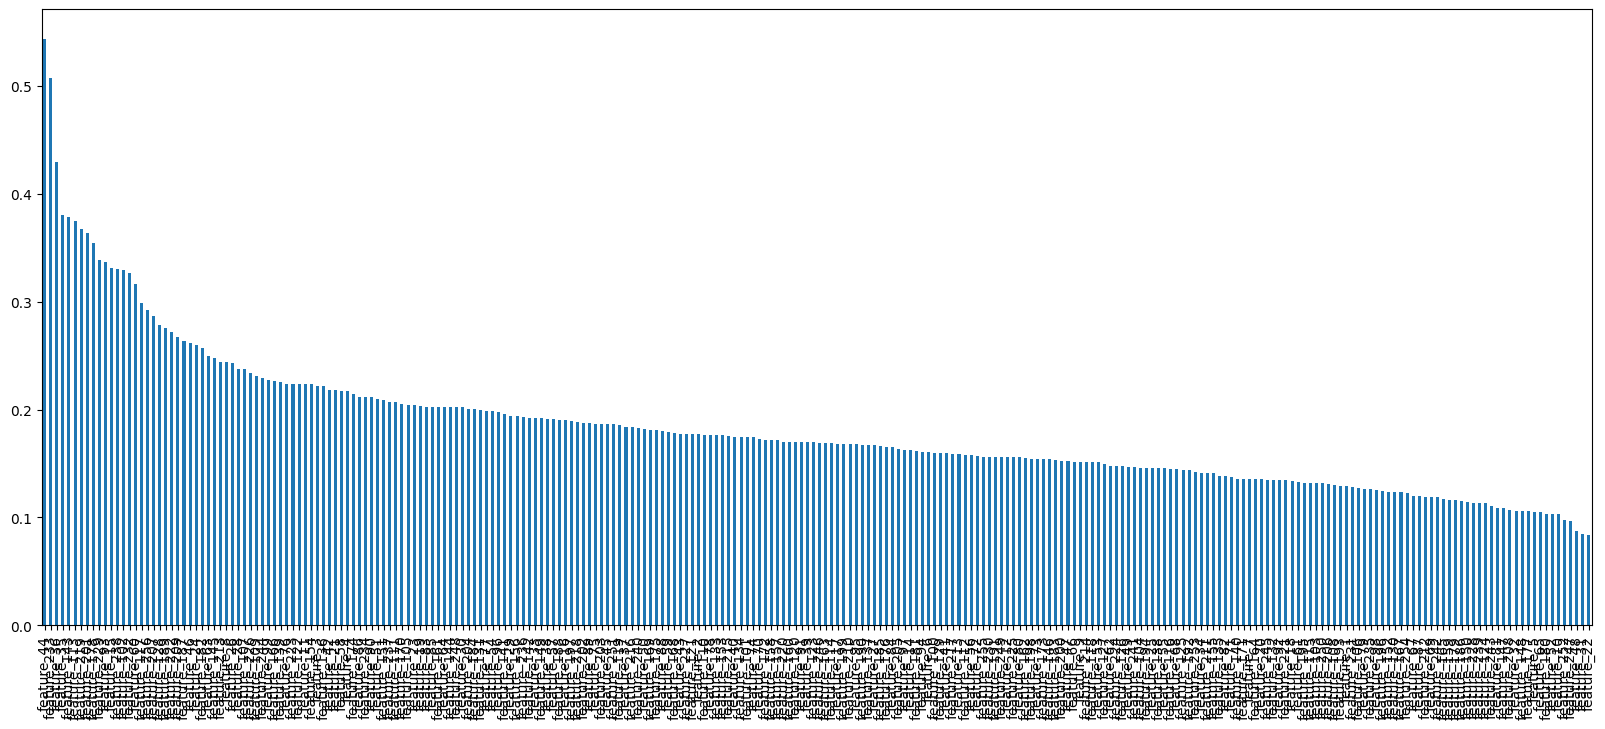

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

#### Lets remove features with information gain less than 0.2 and calculate the acuuracy again

In [ ]:
from sklearn.feature_selection import SelectKBest

# selecting features with greater than 0.25 mutual information scores
X_train_1 = X_train.copy()
X_valid_1 = X_valid.copy()
feature_count_1 = mutual_info[mutual_info > 0.19].count()
sel_five_cols = SelectKBest(mutual_info_classif, k=feature_count_1)
sel_five_cols.fit(X_train_1, Y_train_1)
new_columns_1 = X_train_1.columns[sel_five_cols.get_support()]

In [ ]:
print(new_columns_1)

Index(['feature_3', 'feature_4', 'feature_8', 'feature_11', 'feature_15',
       'feature_19', 'feature_21', 'feature_23', 'feature_24', 'feature_26',
       'feature_28', 'feature_29', 'feature_30', 'feature_33', 'feature_35',
       'feature_36', 'feature_38', 'feature_42', 'feature_44', 'feature_46',
       'feature_51', 'feature_54', 'feature_57', 'feature_58', 'feature_60',
       'feature_63', 'feature_64', 'feature_76', 'feature_77', 'feature_83',
       'feature_85', 'feature_86', 'feature_90', 'feature_93', 'feature_96',
       'feature_99', 'feature_102', 'feature_105', 'feature_107',
       'feature_109', 'feature_111', 'feature_113', 'feature_117',
       'feature_122', 'feature_128', 'feature_131', 'feature_136',
       'feature_139', 'feature_141', 'feature_142', 'feature_143',
       'feature_144', 'feature_145', 'feature_149', 'feature_151',
       'feature_154', 'feature_156', 'feature_161', 'feature_166',
       'feature_170', 'feature_174', 'feature_178', 'feature_18

In [ ]:
print(f'{feature_count_1} features selected out of 260')

86 features selected out of 260


In [ ]:
X_train_1 = X_train_1[new_columns_1]
X_valid_1 = X_valid_1[new_columns_1]
X_train_1.shape, X_valid_1.shape

((28520, 86), (750, 86))

In [ ]:

poly_1_new = SVC(kernel='poly', degree=3, C=1).fit(X_train_1, Y_train_1)
poly_pred = poly_1_new.predict(X_valid_1)
poly_accuracy = accuracy_score(Y_valid_1, poly_pred)
print('New accuracy: ', "%.2f" % (poly_accuracy*100))

New accuracy:  98.67


## Label 2 - Speaker Age

### Apply Support Vector Machine to the original dataset

In [ ]:
Y_train_2 = Y_train['label_2']
Y_valid_2 = Y_valid['label_2']

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

poly_2_original = SVC(kernel='poly', degree=3, C=1).fit(X_train, Y_train_2)
poly_pred = poly_2_original.predict(X_valid)
poly_accuracy = accuracy_score(Y_valid_2, poly_pred)
print('Original accuracy: ', "%.2f" % (poly_accuracy*100))


Original accuracy:  98.27


### Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, Y_train_2)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

feature_44     0.168258
feature_233    0.148438
feature_201    0.134251
feature_143    0.131778
feature_35     0.128227
                 ...   
feature_67     0.021857
feature_98     0.021282
feature_239    0.019865
feature_32     0.019147
feature_48     0.017998
Length: 256, dtype: float64

<Axes: >

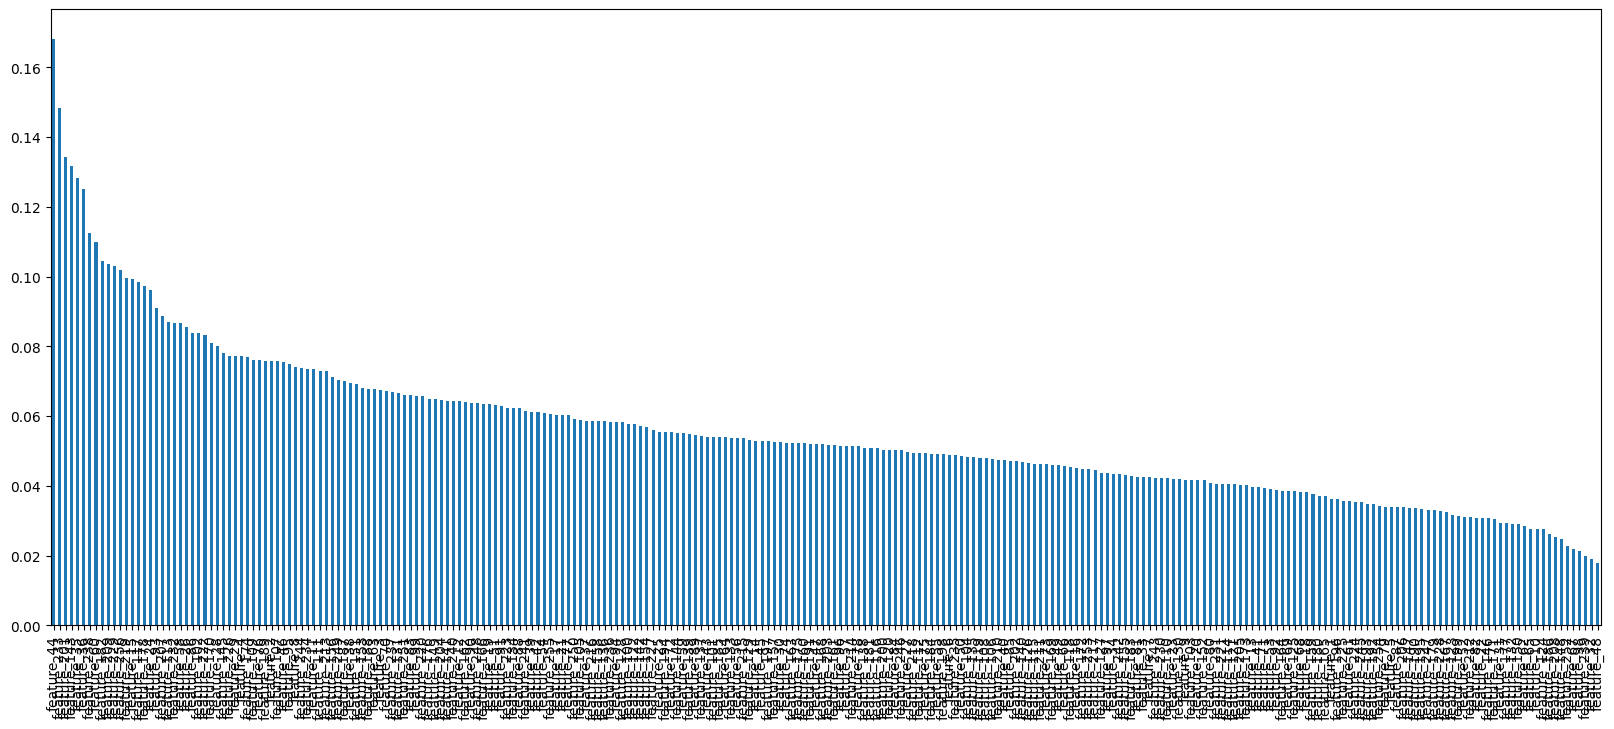

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

#### Lets remove features with information gain less than 0.2 and calculate the acuuracy again

In [ ]:
from sklearn.feature_selection import SelectKBest

# selecting features with greater than 0.25 mutual information scores
X_train_2 = X_train.copy()
X_valid_2 = X_valid.copy()
feature_count_2 = mutual_info[mutual_info > 0.055].count()
sel_five_cols_2 = SelectKBest(mutual_info_classif, k=feature_count_2)
sel_five_cols_2.fit(X_train_2, Y_train_2)
new_columns_2 = X_train_2.columns[sel_five_cols_2.get_support()]

In [ ]:
print(new_columns_2)

Index(['feature_2', 'feature_3', 'feature_4', 'feature_8', 'feature_11',
       'feature_12', 'feature_15', 'feature_17', 'feature_19', 'feature_21',
       ...
       'feature_238', 'feature_240', 'feature_241', 'feature_244',
       'feature_248', 'feature_249', 'feature_250', 'feature_251',
       'feature_255', 'feature_256'],
      dtype='object', length=105)


In [ ]:
print(f'{feature_count_2} features selected out of 260')

105 features selected out of 260


In [ ]:
X_train_2 = X_train_2[new_columns_2]
X_valid_2 = X_valid_2[new_columns_2]
X_train_2.shape, X_valid_2.shape

((28520, 105), (750, 105))

In [ ]:

poly_2_new = SVC(kernel='poly', degree=3, C=1).fit(X_train_2, Y_train_2)
poly_pred = poly_2_new.predict(X_valid_2)
poly_accuracy = accuracy_score(Y_valid_2, poly_pred)
print('New accuracy: ', "%.2f" % (poly_accuracy*100))

New accuracy:  97.07


## Label 3 - Speaker Gender

### Apply Support Vector Machine to the original dataset

In [ ]:
Y_train_3 = Y_train['label_3']
Y_valid_3 = Y_valid['label_3']

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

poly_3_original = SVC(kernel='poly', degree=3, C=1).fit(X_train, Y_train_3)
poly_pred = poly_3_original.predict(X_valid)
poly_accuracy = accuracy_score(Y_valid_3, poly_pred)
print('Original accuracy: ', "%.2f" % (poly_accuracy*100))


Original accuracy:  100.00


### Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, Y_train_3)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

feature_233    0.364976
feature_44     0.344484
feature_36     0.305784
feature_113    0.240820
feature_143    0.220282
                 ...   
feature_126    0.000000
feature_92     0.000000
feature_48     0.000000
feature_20     0.000000
feature_129    0.000000
Length: 256, dtype: float64

<Axes: >

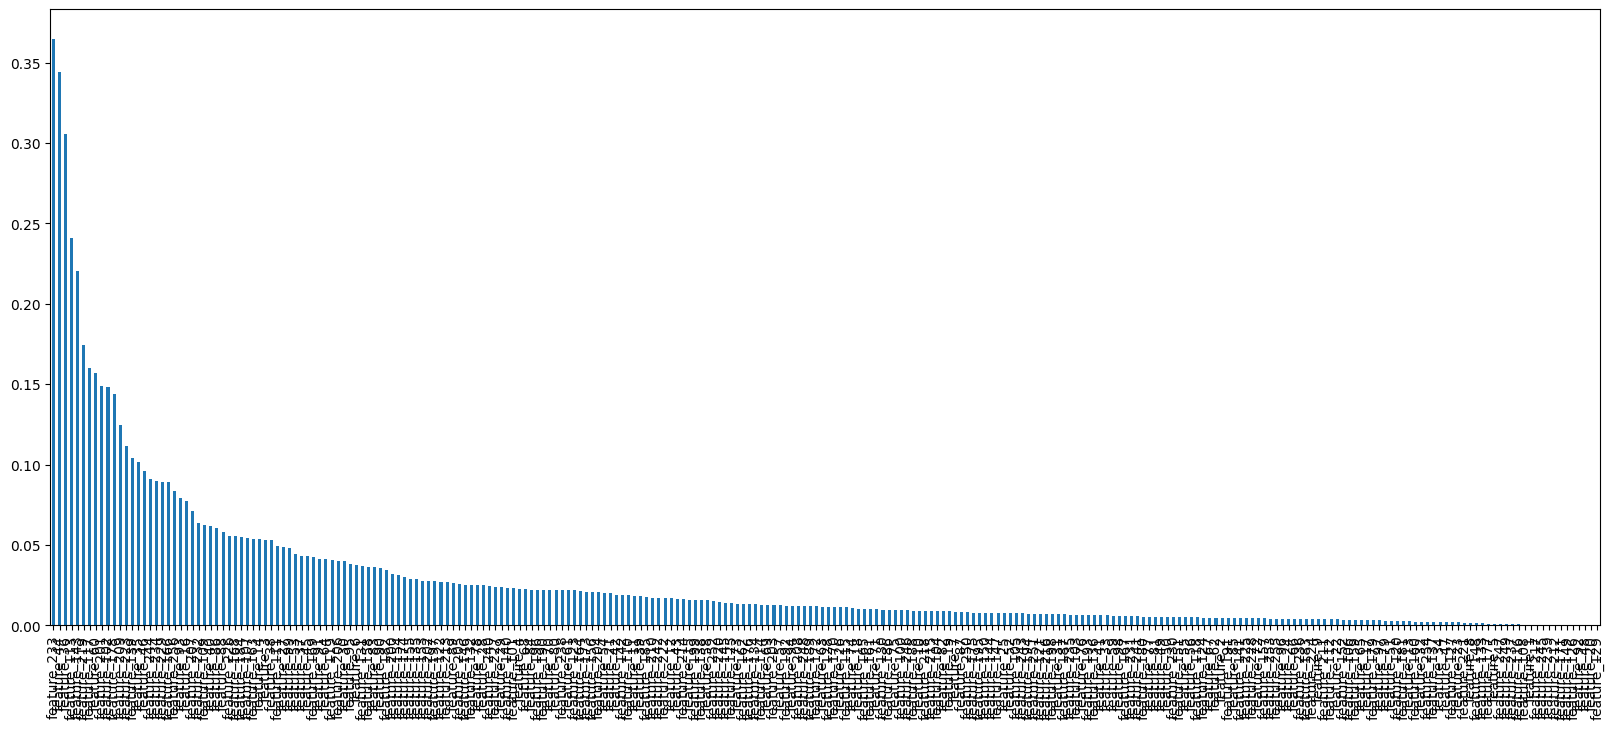

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

#### Lets remove features with information gain less than 0.2 and calculate the acuuracy again

In [ ]:
from sklearn.feature_selection import SelectKBest

# selecting features with greater than 0.25 mutual information scores
X_train_3 = X_train.copy()
X_valid_3 = X_valid.copy()
feature_count_3 = mutual_info[mutual_info > 0.05].count()
sel_five_cols_3 = SelectKBest(mutual_info_classif, k=feature_count_3)
sel_five_cols_3.fit(X_train_3, Y_train_3)
new_columns_3 = X_train_3.columns[sel_five_cols_3.get_support()]

In [ ]:
print(new_columns_3)

Index(['feature_3', 'feature_14', 'feature_16', 'feature_35', 'feature_36',
       'feature_38', 'feature_40', 'feature_44', 'feature_46', 'feature_60',
       'feature_86', 'feature_88', 'feature_93', 'feature_102', 'feature_107',
       'feature_109', 'feature_113', 'feature_117', 'feature_139',
       'feature_143', 'feature_163', 'feature_166', 'feature_168',
       'feature_178', 'feature_184', 'feature_201', 'feature_207',
       'feature_209', 'feature_219', 'feature_223', 'feature_226',
       'feature_229', 'feature_232', 'feature_233', 'feature_234',
       'feature_244', 'feature_256'],
      dtype='object')


In [ ]:
print(f'{feature_count_3} features selected out of 260')

37 features selected out of 260


In [ ]:
X_train_3 = X_train_3[new_columns_3]
X_valid_3 = X_valid_3[new_columns_3]
X_train_3.shape, X_valid_3.shape

((28520, 37), (750, 37))

In [ ]:

poly_3_new = SVC(kernel='poly', degree=3, C=1).fit(X_train_3, Y_train_3)
poly_pred = poly_3_new.predict(X_valid_3)
poly_accuracy = accuracy_score(Y_valid_3, poly_pred)
print('New accuracy: ', "%.2f" % (poly_accuracy*100))

New accuracy:  99.73


## Label 4 - Speaker Accent

### Apply Support Vector Machine to the original dataset

In [ ]:
Y_train_4 = Y_train['label_4']
Y_valid_4 = Y_valid['label_4']

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

poly_4_original = SVC(kernel='poly', class_weight='balanced', degree=3, C=1).fit(X_train, Y_train_4)
poly_pred = poly_4_original.predict(X_valid)
poly_accuracy = accuracy_score(Y_valid_4, poly_pred)
print('Original accuracy: ', "%.2f" % (poly_accuracy*100))


Original accuracy:  98.53


### Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, Y_train_4)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

feature_36     0.123839
feature_44     0.123294
feature_233    0.118794
feature_113    0.103818
feature_143    0.102030
                 ...   
feature_252    0.016814
feature_192    0.015600
feature_48     0.014513
feature_32     0.013458
feature_5      0.010000
Length: 256, dtype: float64

<Axes: >

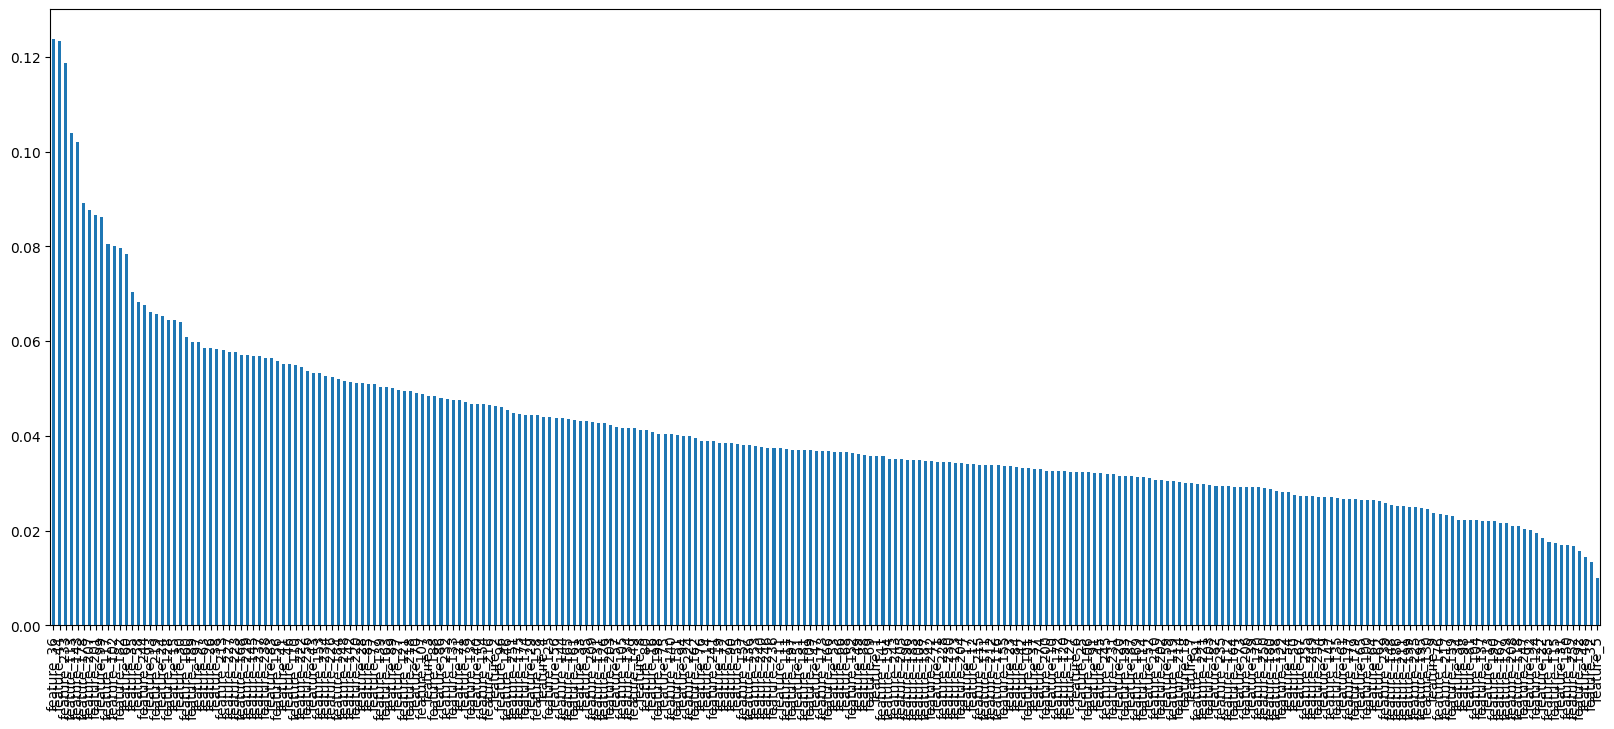

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

#### Lets remove features with information gain less than 0.2 and calculate the acuuracy again

In [ ]:
from sklearn.feature_selection import SelectKBest

# selecting features with greater than 0.25 mutual information scores
X_train_4 = X_train.copy()
X_valid_4 = X_valid.copy()
feature_count_4 = mutual_info[mutual_info > 0.035].count()
sel_five_cols_4 = SelectKBest(mutual_info_classif, k=feature_count_4)
sel_five_cols_4.fit(X_train_4, Y_train_4)
new_columns_4 = X_train_4.columns[sel_five_cols_4.get_support()]

In [ ]:
print(new_columns_4)

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_8',
       'feature_11', 'feature_14', 'feature_15', 'feature_16', 'feature_19',
       ...
       'feature_238', 'feature_240', 'feature_241', 'feature_243',
       'feature_244', 'feature_246', 'feature_248', 'feature_251',
       'feature_253', 'feature_256'],
      dtype='object', length=140)


In [ ]:
print(f'{feature_count_4} features selected out of 260')

140 features selected out of 260


In [ ]:
X_train_4 = X_train_4[new_columns_4]
X_valid_4 = X_valid_4[new_columns_4]
X_train_4.shape, X_valid_4.shape

((28520, 140), (750, 140))

In [ ]:
poly_4_new = SVC(kernel='poly', class_weight= 'balanced', degree=3, C=1).fit(X_train_4, Y_train_4)
poly_pred = poly_4_new.predict(X_valid_4)
poly_accuracy = accuracy_score(Y_valid_4, poly_pred)
print('New accuracy: ', "%.2f" % (poly_accuracy*100))

New accuracy:  97.07


## Testing

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
X_test = test[features]
X_test_1 = test[new_columns_1]
X_test_2 = test[new_columns_2]
X_test_3 = test[new_columns_3]
X_test_4 = test[new_columns_4]

In [ ]:
def predict(X_test, new_columns, feature_count, model_org, model_new, filename):
    df = pd.DataFrame()
    X_test_new = X_test[new_columns]
    test_org = model_org.predict(X_test)
    df['Predicted labels before feature engineering'] = test_org
    test_new = model_new.predict(X_test_new)
    df['Predicted labels after feature engineering'] = test_new
    df['No of new features'] = feature_count
    for feature in features:
        new_feature = 'new_' + feature
        if feature not in new_columns:
          df[new_feature] = pd.NA
        else:
          df[new_feature] = X_test[feature]
    df.to_csv(filename, index=False)

In [ ]:
predict(X_test, new_columns_1, feature_count_1, poly_1_original, poly_1_new, '190159D_label_1.csv')
predict(X_test, new_columns_2, feature_count_2, poly_2_original, poly_2_new, '190159D_label_2.csv')
predict(X_test, new_columns_3, feature_count_3, poly_3_original, poly_3_new, '190159D_label_3.csv')
predict(X_test, new_columns_4, feature_count_4, poly_4_original, poly_4_new, '190159D_label_4.csv')